# SMS Spam Collection using NLP

Link to Data Set : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below.**

In [1]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA
# WATCH THE VIDEO FOR FULL INSTRUCTIONS ON THIS STEP

# Uncomment the code below and run:

# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

## Imports

Import nltk, pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll be using a dataset from the UCI datasets! This dataset is already located in the folder for this project.

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

We will be using this data to build a spam detection filter.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


A collection of texts is also sometimes called "corpus". Let's print the first nine messages and number them using **enumerate**:

In [4]:
for message_no, message in enumerate(messages[:9]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

## Splitting Text

This is a [TSV] ("tab separated values") file, which can be identified by the spacing, and the first column of the file contains a label indicating whether the supplied message is a regular message (often referred to as "ham") or "spam." The message itself is in the second column. (Note that our numbers are only from the **enumerate** call; they are not a part of the file.)

We'll build a machine learning model to automatically distinguish between spam and ham using these instances of labelled ham. We will then be able to categorise random unlabeled messages as spam or ham using a trained model.

**We can simply use pandas instead of manually parsing TSV in Python**

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [5]:
msg = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [6]:
msg.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [7]:
msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We want to begin considering the features we'll be employing as we carry out our analysis. This is consistent with the feature engineering philosophy in general. Your capacity to develop new characteristics from the data depends on how well you understand its domain. In general, feature engineering plays a significant role in spam detection.

Let's make a new column to detect how long the text messages are:

In [8]:
msg['length'] = msg['message'].apply(len)
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

<AxesSubplot:ylabel='Frequency'>

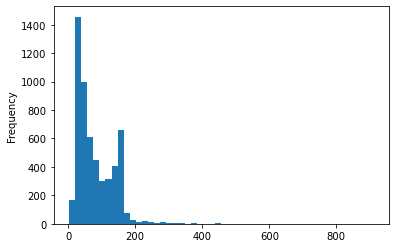

In [9]:
msg['length'].plot(bins=50, kind='hist') 

Change the bin size around! It appears that considering text length is an useful aspect to consider! Let's try to explain why the x-axis extends all the way to 1000 or so; there must be a really lengthy message here!

In [10]:
msg.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

910 characters, let's use masking to find this message:

In [11]:
msg[msg['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

It appears that we have a Romeo sending SMS! Returning to the question of whether message length may be used to differentiate between ham and spam.

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

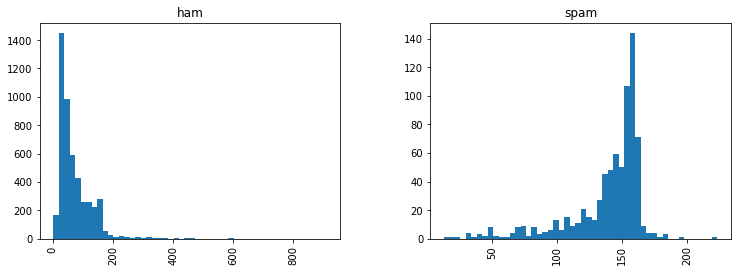

In [12]:
msg.hist(column='length', by='label', bins=50,figsize=(12,4))

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. 

Let's start processing the data so that we can eventually use SciKit Learn with it!

## Text Pre-processing

The fact that all of our data is in text format is our major problem (strings). The classification task will be carried out by the classification algorithms that we have learned about so far using some kind of numerical feature vector. A corpus can be converted to a vector format using a variety of techniques. The [bag-of-words] technique, where each distinct word in a text is represented by one integer, is the simplest.

The raw messages (sequence of characters) will be converted into vectors in this phase (sequences of numbers).

Let's start by creating a function that breaks down a message into its component words and returns a list. We'll also get rid of words like "the" and "a," etc. We will make use of the NLTK library to accomplish this. It is essentially the default Python text processing module and includes a tonne of helpful features. Here, we'll merely employ a few of the fundamental ones.

Create a method to handle the text in the message column, and then use pandas' **apply()** function to handle all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [13]:
import string

messeage = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in messeage if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [16]:
# Now just remove any stopwords
clean_messeage = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
clean_messeage

['Sample', 'message', 'Notice', 'punctuation']

Now let's put both of these together in a function to apply it to our DataFrame later on:

In [18]:
# Takes in a string of text, then performs the following:
# 1. Remove all punctuation
# 2. Remove all stopwords
# 3. Returns a list of the cleaned text
    
def text_process(messeage):
   
    # Check characters to see if they are in punctuation
    nopunc = [char for char in messeage if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Here is the original DataFrame again:

In [19]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let's "tokenize" these communications right now. Tokenization simply refers to the procedure of turning a list of regular text strings into a collection of tokens.

In [20]:
# Check to make sure its working
msg['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [21]:
# Show original dataframe
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Stemming Text

Stemming is the process of reducing inflected or derived words to their word stem or root.

In [22]:
ps = nltk.PorterStemmer()

In [23]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [24]:
# make new "stemmed words data" column
msg['stem'] = msg['message'].apply(lambda x: stemming(x))
msg.head()

,label,message,length,stem
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[g, o, , u, n, t, i, l, , j, u, r, o, n, g, ..."
1,ham,Ok lar... Joking wif u oni...,29,"[o, k, , l, a, r, ., ., ., , j, o, k, i, n, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[f, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, , d, u, n, , s, a, y, , s, o, , e, a, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[n, a, h, , i, , d, o, n, ', t, , t, h, i, ..."


## Lemmatizing Text

Lemmatizing is the process of returning a word to its dictionary form by removing inflectional endings. Although it requires more resources, this text cleaning technique is more accurate.

In [25]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [26]:
# make new "lemmatized words data" column
msg['lem'] = msg['message'].apply(lambda x: lemmatizing(x))
msg.head()

,label,message,length,stem,lem
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[g, o, , u, n, t, i, l, , j, u, r, o, n, g, ...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, ..."
1,ham,Ok lar... Joking wif u oni...,29,"[o, k, , l, a, r, ., ., ., , j, o, k, i, n, ...","[O, k, , l, a, r, ., ., ., , J, o, k, i, n, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[f, r, e, e, , e, n, t, r, y, , i, n, , 2, ...","[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, , d, u, n, , s, a, y, , s, o, , e, a, ...","[U, , d, u, n, , s, a, y, , s, o, , e, a, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[n, a, h, , i, , d, o, n, ', t, , t, h, i, ...","[N, a, h, , I, , d, o, n, ', t, , t, h, i, ..."


At the end even though we did the stemming and lemmatization, we didnt actually use it, we just showed that it would be done for this dataset as instructed in the assignment.

## Vectorization

The messages must now be transformed from lists of tokens, or "lemmas," that are how we now have them into vectors that SciKit Learn's algorithm models can use.

We will now translate each message, which was previously represented as a list of tokens (lemmas), into a vector that computer learning models can comprehend.

We'll carry out that utilising the bag-of-words paradigm in three steps:

1. Determine the frequency of each word in each message (Known as term frequency)

2. Weigh the counts so that tokens used frequently are given less weight (inverse document frequency)

3. To remove the original text length, normalise the vectors to a unit length (L2 norm)

Let's start with the first phase:

We can anticipate a lot of zero counts for the word's presence in the document because there are so many messages. SciKit Learn will produce a Sparse Matrix as a result.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [28]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(msg['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:

In [29]:
message4 = msg['message'][3]
print(message4)

U dun say so early hor... U c already then say...


Let's examine it in vector form now:

In [30]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


This indicates that message number 4 has seven distinct words (after removing common stop words). The rest only appear once, while two of them do so twice. Let's confirm which ones do indeed show twice by checking:

In [31]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [32]:
messages_bow = bow_transformer.transform(msg['message'])

In [33]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [34]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF] by using scikit-learn

### So what is TF-IDF?

Information retrieval and text mining frequently employ the TF-IDF weight, which stands for term frequency-inverse document frequency. This weight is a statistical metric used to assess a word's significance to a collection or corpus of documents. The frequency of the term in the corpus offsets the importance, which rises in direct proportion to the frequency of a word in the document. Search engines frequently utilise variations of the tf-idf weighting scheme as their main scoring and ranking mechanism for determining how relevant a document is to a user query.

The tf-idf for each query term is added to create one of the most basic ranking functions; many more complex ranking functions are variations of this basic model.

The normalised Term Frequency (TF) is calculated as the logarithm of the number of documents in the corpus divided by the number of documents where the specific term appears. The Inverse Document Frequency (IDF) is computed as the logarithm of the number of documents in the corpus divided by the number of documents where the specific term appears.

Let's go ahead and see how we can do this in SciKit Learn:

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [36]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [37]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


The data can be preprocessed and vectorized in a variety of ways. These actions entail designing a "pipeline" and performing feature engineering.

## Training the model

Our spam/ham classifier can now be trained using messages as vectors. Actually, we can apply practically any classification algorithm today. The Naive Bayes classification algorithm is a great choice for a variety of reasons.

Scikit-learn will be used, with the Naive Bayes classifier as a starting point:

In [38]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, msg['label'])

Let's try classifying our single random message and checking how we do:

In [39]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', msg.label[3])

predicted: ham
expected: ham


**Fantastic! We've created a model that can try to forecast the classification of spam versus ham!**

## Model Evaluation

We now want to assess how well our model will perform across the board on the complete dataset. Let's start by gathering all the forecasts:

In [40]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


We may use the classification report that is integrated into SciKit Learn and returns [accuracy, recall,] [f1-score], and a column for support (meaning how many cases supported that classification).

In [41]:
from sklearn.metrics import classification_report
print (classification_report(msg['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are many other metrics that might be used to assess model performance. The task at hand and the financial impact of any decisions made using the model will determine which is the most crucial. For instance, the cost of mistaking "spam" for "ham" is most likely significantly smaller than the cost of mistaking "ham" for "spam."

The accuracy of the model was assessed using the same training data in the aforementioned "assessment". Never truly evaluate using the same dataset that you trained on!

We can learn nothing about our model's actual forecasting ability from such an evaluation. Even though we wouldn't be able to categorise any new messages, the accuracy on training data would trivially be 100% if we merely remembered every sample throughout training.

The data should be divided into a training set and a test set, with the training set only ever being seen by the model during model fitting and parameter tuning. No use is ever made of the test results. This is our final assessment of the test data's ability to accurately predict outcomes.

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(msg['message'], msg['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's rerun our model and make predictions based on the test set. SciKit Learn's pipeline features will be used by us to store a workflow pipeline. This will enable us to set up all of the data transformations we'll make for later use.

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [44]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000172C7167B80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [45]:
predictions = pipeline.predict(msg_test)

In [46]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1013
        spam       0.75      1.00      0.86       102

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



Now we have a classification report for our model on a true testing set.